In [261]:
import sys
sys.path.append('..')

In [262]:
# Import required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
from datetime import datetime
import re
from src.db import ProductTable, SellerTable, engine, SessionLocal

In [263]:
db_session = SessionLocal()

### Getting data from .parquet files

In [264]:
output_folder = '../src/parser/data8'

data = []
for file in os.listdir(output_folder):
    if file.endswith('.parquet'):
        df = pd.read_parquet(f'{output_folder}/{file}')
        data.append(df)
data = pd.concat(data)

In [265]:
print(data.shape)
data.head()

(2598, 23)


,title,price,characteristics,description,views,date,location,link,seller_id,today_views,...,rating,reviews,subscribers,subscriptions,registered,done_deals,active_deals,docs_confirmed,phone_confirmed,response_time
0,"iPhone 16, 128 ГБ",81990,"{'IMEI': None, 'Встроенная память': '128 ГБ', ...","В наличии Аpрle iPhonе 16 128 GВ Ultrаmаrine, ...",3056,· 11 ноября 2024,"Санкт-Петербург, Кирочная ул., 5",https://www.avito.ru/sankt-peterburg/telefony/...,/brands/ibox,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"iPhone 16 Pro, 256 ГБ",123900,"{'IMEI': None, 'Встроенная память': '256 ГБ', ...",Нoвый. Зaпечaтанный. Оpигинал. Корoбка зaпечат...,9166,· 28 декабря 2024,"Санкт-Петербург, ул. Жуковского, 28",https://www.avito.ru/sankt-peterburg/telefony/...,/brands/i137588249,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"iPhone 13, 128 ГБ",33090,"{'IMEI': None, 'Встроенная память': '128 ГБ', ...",✨Тradе-in от MIRАPHОNЕ на НOВЫX УСЛОBИЯХ! Не у...,865,· 13 декабря 2024,"Санкт-Петербург, Садовая ул., 38",https://www.avito.ru/sankt-peterburg/telefony/...,/brands/i59503469,26,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"iPhone 13 Pro, 128 ГБ",35590,"{'IMEI': None, 'Встроенная память': '128 ГБ', ...",Hаш мaгaзин цифровой тeхникиТе:hubзанимaетcя п...,7320,· 10 декабря 2024,"Санкт-Петербург, пл. Стачек, 9",https://www.avito.ru/sankt-peterburg/telefony/...,/brands/244096b73b687e69b4c9374622919ee3,50,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"iPhone 16 Pro Max, 256 ГБ",134990,"{'IMEI': None, 'Встроенная память': '256 ГБ', ...",НOBЫЙ✅ ЕBPОTЕСТ🇪🇺 ВCЕ ЦBЕTA✅ ТRADE-IN | ДОСTABKA✅,4892,· вчера в 14:17,"Санкт-Петербург, Банковский пер., 4",https://www.avito.ru/sankt-peterburg/telefony/...,/brands/i156460275,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Getting data from database using sqlAlchemy

In [266]:
products = db_session.query(ProductTable).all()
sellers = db_session.query(SellerTable).all()

In [267]:
import json

# products to dataframe
products_data = []
for product in products:
    products_data.append(product.__dict__)
products_data = pd.DataFrame(products_data)

# deserialize the characteristics and about from json
products_data['characteristics'] = products_data['characteristics'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)
products_data['about'] = products_data['about'].apply(lambda x: json.loads(x) if isinstance(x, str) else x)
products_data.drop(columns=['_sa_instance_state'], inplace=True)

# sellers to dataframe
sellers_data = []
for seller in sellers:
    sellers_data.append(seller.__dict__)
sellers_data = pd.DataFrame(sellers_data)
sellers_data.drop(columns=['_sa_instance_state'], inplace=True)


In [268]:
products_data.head()

,price,link,description,date,seller_id,about,title,characteristics,views,location,today_views,is_sold
0,18500.0,https://www.avito.ru/sankt-peterburg/telefony/...,Без сколов и дефектов.Все детали в рабочем сос...,· 12 декабря 2024,14c4bda6-d5ac-40f8-9f27-98a61a192948,"{'Комплект': None, 'Коробка запечатана': None,...","iPhone 11, 128 ГБ","{'IMEI': None, 'Встроенная память': '128 ГБ', ...",647.0,"Санкт-Петербург, Торфяная дорога, 15к1",0.0,False
1,18000.0,https://www.avito.ru/sankt-peterburg/telefony/...,Использовался с защитным стеклом. Чехол в пода...,· 16 декабря 2024,fe188415-7ad5-4a3c-91d9-007b043c9ecc,"{'Комплект': None, 'Коробка запечатана': None,...","iPhone 11, 128 ГБ","{'IMEI': None, 'Встроенная память': '128 ГБ', ...",268.0,"Санкт-Петербург, Штурманская ул., 30",4.0,False
2,12000.0,https://www.avito.ru/sankt-peterburg/telefony/...,айфон xr,· 4 декабря 2024,5677aa18-c4db-4be3-9bc5-2b64837c0e54,"{'Комплект': None, 'Коробка запечатана': None,...","iPhone Xr, 128 ГБ","{'IMEI': None, 'Встроенная память': '128 ГБ', ...",429.0,Санкт-Петербург,8.0,False
3,15225.0,https://www.avito.ru/sankt-peterburg/telefony/...,Прoдaм iРhone 11 256gb жeлтoго цвета (yеllow),· 30 декабря 2024,/brands/e6a07ae9210c18e0b9a6cf2512c3f5cb,"{'Комплект': 'Блок зарядки, Провод зарядки', '...","iPhone 11, 256 ГБ","{'IMEI': None, 'Встроенная память': '256 ГБ', ...",373.0,Санкт-Петербург,12.0,False
4,14500.0,/sankt-peterburg/telefony/iphone_11_128_gb_484...,None,23 декабря 2024,/brands/e6a07ae9210c18e0b9a6cf2512c3f5cb,None,"iPhone 11, 128 ГБ",None,NaN,"Санкт-Петербург, пр-т Славы, 9",NaN,True


### Cleaning data

In [269]:
month_map = {
    'января': 'January',
    'февраля': 'February',
    'марта': 'March',
    'апреля': 'April',
    'мая': 'May',
    'июня': 'June',
    'июля': 'July',
    'августа': 'August',
    'сентября': 'September',
    'октября': 'October',
    'ноября': 'November',
    'декабря': 'December'
}

def parse_timestamp(timestamp):
    cleaned = timestamp[2:].strip()

    for ru_month, en_month in month_map.items():
        if ru_month in cleaned:
            cleaned = cleaned.replace(ru_month, en_month)
            break
    if 'сегодня' in cleaned:
        cleaned = cleaned.replace('сегодня', datetime.now().strftime('%d %B'))
    elif 'вчера' in cleaned:
        cleaned = cleaned.replace('вчера', (datetime.now() - pd.Timedelta(days=1)).strftime('%d %B'))
    
    # check if year is not present (like 20...)
    if not cleaned[-4:].isdigit():
        # if day and month is 01-01 year is now
        if '01 January' in cleaned or '02 January' in cleaned:
            cleaned = cleaned + f' {datetime.now().year}'
        else:
            cleaned = cleaned + f' {datetime.now().year - 1}'
    try:
        return datetime.strptime(cleaned, '%d %B в %H:%M %Y')
    except ValueError:
        try:
            return datetime.strptime(cleaned, '%d %B %Y')
        except ValueError:
            return datetime.strptime(cleaned, '%B %Y')



In [270]:
# · 13 декабря в 23:09 to datetime
products_data['date'] = products_data['date'].apply(parse_timestamp)
products_data['date'].head()

0   2024-12-12
1   2024-12-16
2   2024-12-04
3   2024-12-30
4   2024-12-01
Name: date, dtype: datetime64[ns]

### Getting new features from characteristics of the data
as :
- capacity
- phone version
- max version
- pro version

In [271]:
def parse_characteristics(characteristics):
    if not characteristics:
        return None, None, None, None
    version = None
    is_pro = False
    is_max = False
    capacity = None

    version_match = re.search(r'\b\w+ ?(\d+)', characteristics['Модель'])
    if version_match:
        version = int(version_match.group(1))
    
    xr_match = re.search(r'\b\w+ ?[Xx][rR]?', characteristics['Модель'])
    if xr_match:
        version = 10
    if version is None:
        print(f'Version in {characteristics["Модель"]} not found')

    is_pro_match = re.search(r'[pP]ro', characteristics['Модель'])
    if is_pro_match:
        is_pro = True

    is_max_match = re.search(r'Max', characteristics['Модель'])
    if is_max_match:
        is_max = True

    capacity_match = re.search(r'(\d+) ?[gGtTгГтТ][bBбБ]', characteristics['Встроенная память'])
    if capacity_match:
        capacity = int(capacity_match.group(1))


    return version, is_pro, is_max, capacity    


In [272]:
def parse_title(title):
    if not title:
        return None, None, None, None
    version = None
    is_pro = False
    is_max = False
    capacity = None

    version_match = re.search(r'\biphone ?(\d+)', title, re.IGNORECASE)
    if version_match:
        version = int(version_match.group(1))

    xr_match = re.search(r'\b\w+ ?[Xx][rR]?', title)
    if xr_match and not version:
        version = 10

    if "pro" in title.lower():
        is_pro = True

    if "max" in title.lower():
        is_max = True

    capacity_match = re.search(r'(\d+) ?[gGtTгГтТ][bBбБ]', title)


    if capacity_match:
        capacity = int(capacity_match.group(1))

    return version, is_pro, is_max, capacity   

In [273]:
products_data['version'], products_data['is_pro'], products_data['is_max'], products_data['capacity'] = zip(*products_data.apply(lambda x: parse_title(x['title']) if x['is_sold'] else parse_characteristics(x['characteristics']), axis=1))   

Version in iPhone SE not found
Version in iPhone SE not found
Version in iPhone SE not found
Version in iPhone SE not found
Version in iPhone SE not found


In [274]:
# getting condition
products_data['condition'] = products_data['characteristics'].apply(lambda x: x['Состояние'] if x else None)

In [275]:
sellers_data.head()

,reviews,name,subscriptions,done_deals,docs_confirmed,response_time,seller_id,rating,subscribers,registered,active_deals,phone_confirmed
0,NaN,Unknown,NaN,NaN,False,Отвечает около 30 минут,7aeef58e-c3f8-423a-a3c2-bb000756f1c7,NaN,NaN,None,NaN,False
1,NaN,Unknown,NaN,NaN,True,None,7777ebc4-ca00-4b4f-952f-203b549bae97,4.8,NaN,None,NaN,False
2,NaN,Unknown,NaN,NaN,False,Отвечает около 30 минут,84c47f4c-7ca5-4946-9e3e-609bb669a1f1,4.8,NaN,None,NaN,False
3,NaN,Unknown,NaN,NaN,False,Отвечает около часа,8021f8e1-722a-4509-9c43-05434ae9d109,NaN,NaN,None,NaN,False
4,NaN,Unknown,NaN,NaN,False,None,135b9f8c-70fb-449a-8df5-81703789ac72,5.0,NaN,None,NaN,False


In [276]:
# На Авито с февраля 2011 to datetime
def parse_registered(timestamp):
    if timestamp is None:
        return None
    cleaned = timestamp.replace('На Авито с ', '').strip()

    for ru_month, en_month in month_map.items():
        if ru_month in cleaned:
            cleaned = cleaned.replace(ru_month, en_month)
            break

    try:
        return datetime.strptime(cleaned, '%d %B %Y')
    except ValueError:
        return datetime.strptime(cleaned, '%B %Y')
        

sellers_data['registered'] = sellers_data['registered'].apply(parse_registered)

In [277]:
# get the number of sellers registered with known date of registration
sellers_data['registered'].apply(lambda x: x if x.day != 1 else None).value_counts().head()

registered
2024-10-21    1
2024-11-09    1
2024-12-18    1
2024-11-06    1
2024-12-12    1
Name: count, dtype: int64

-------

In [278]:
# merge the data
df = products_data
df = df.merge(sellers_data, on='seller_id')

In [279]:
df.head()

,price,link,description,date,seller_id,about,title,characteristics,views,location,...,name,subscriptions,done_deals,docs_confirmed,response_time,rating,subscribers,registered,active_deals,phone_confirmed
0,18500.0,https://www.avito.ru/sankt-peterburg/telefony/...,Без сколов и дефектов.Все детали в рабочем сос...,2024-12-12,14c4bda6-d5ac-40f8-9f27-98a61a192948,"{'Комплект': None, 'Коробка запечатана': None,...","iPhone 11, 128 ГБ","{'IMEI': None, 'Встроенная память': '128 ГБ', ...",647.0,"Санкт-Петербург, Торфяная дорога, 15к1",...,Unknown,NaN,NaN,True,None,4.8,NaN,NaT,NaN,False
1,18000.0,https://www.avito.ru/sankt-peterburg/telefony/...,Использовался с защитным стеклом. Чехол в пода...,2024-12-16,fe188415-7ad5-4a3c-91d9-007b043c9ecc,"{'Комплект': None, 'Коробка запечатана': None,...","iPhone 11, 128 ГБ","{'IMEI': None, 'Встроенная память': '128 ГБ', ...",268.0,"Санкт-Петербург, Штурманская ул., 30",...,Unknown,NaN,NaN,False,Отвечает около часа,NaN,NaN,NaT,NaN,False
2,12000.0,https://www.avito.ru/sankt-peterburg/telefony/...,айфон xr,2024-12-04,5677aa18-c4db-4be3-9bc5-2b64837c0e54,"{'Комплект': None, 'Коробка запечатана': None,...","iPhone Xr, 128 ГБ","{'IMEI': None, 'Встроенная память': '128 ГБ', ...",429.0,Санкт-Петербург,...,Unknown,NaN,NaN,False,Отвечает за несколько часов,5.0,NaN,NaT,NaN,False
3,15225.0,https://www.avito.ru/sankt-peterburg/telefony/...,Прoдaм iРhone 11 256gb жeлтoго цвета (yеllow),2024-12-30,/brands/e6a07ae9210c18e0b9a6cf2512c3f5cb,"{'Комплект': 'Блок зарядки, Провод зарядки', '...","iPhone 11, 256 ГБ","{'IMEI': None, 'Встроенная память': '256 ГБ', ...",373.0,Санкт-Петербург,...,Okay let's go,3.0,56.0,True,Отвечает около 30 минут,4.8,11.0,2024-05-01,1.0,True
4,14500.0,/sankt-peterburg/telefony/iphone_11_128_gb_484...,None,2024-12-01,/brands/e6a07ae9210c18e0b9a6cf2512c3f5cb,None,"iPhone 11, 128 ГБ",None,NaN,"Санкт-Петербург, пр-т Славы, 9",...,Okay let's go,3.0,56.0,True,Отвечает около 30 минут,4.8,11.0,2024-05-01,1.0,True


In [280]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1503 entries, 0 to 1502
Data columns (total 28 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   price            1503 non-null   float64       
 1   link             1503 non-null   object        
 2   description      614 non-null    object        
 3   date             1503 non-null   datetime64[ns]
 4   seller_id        1503 non-null   object        
 5   about            602 non-null    object        
 6   title            1503 non-null   object        
 7   characteristics  614 non-null    object        
 8   views            614 non-null    float64       
 9   location         1503 non-null   object        
 10  today_views      614 non-null    float64       
 11  is_sold          1503 non-null   bool          
 12  version          1472 non-null   float64       
 13  is_pro           1503 non-null   bool          
 14  is_max           1503 non-null   bool   

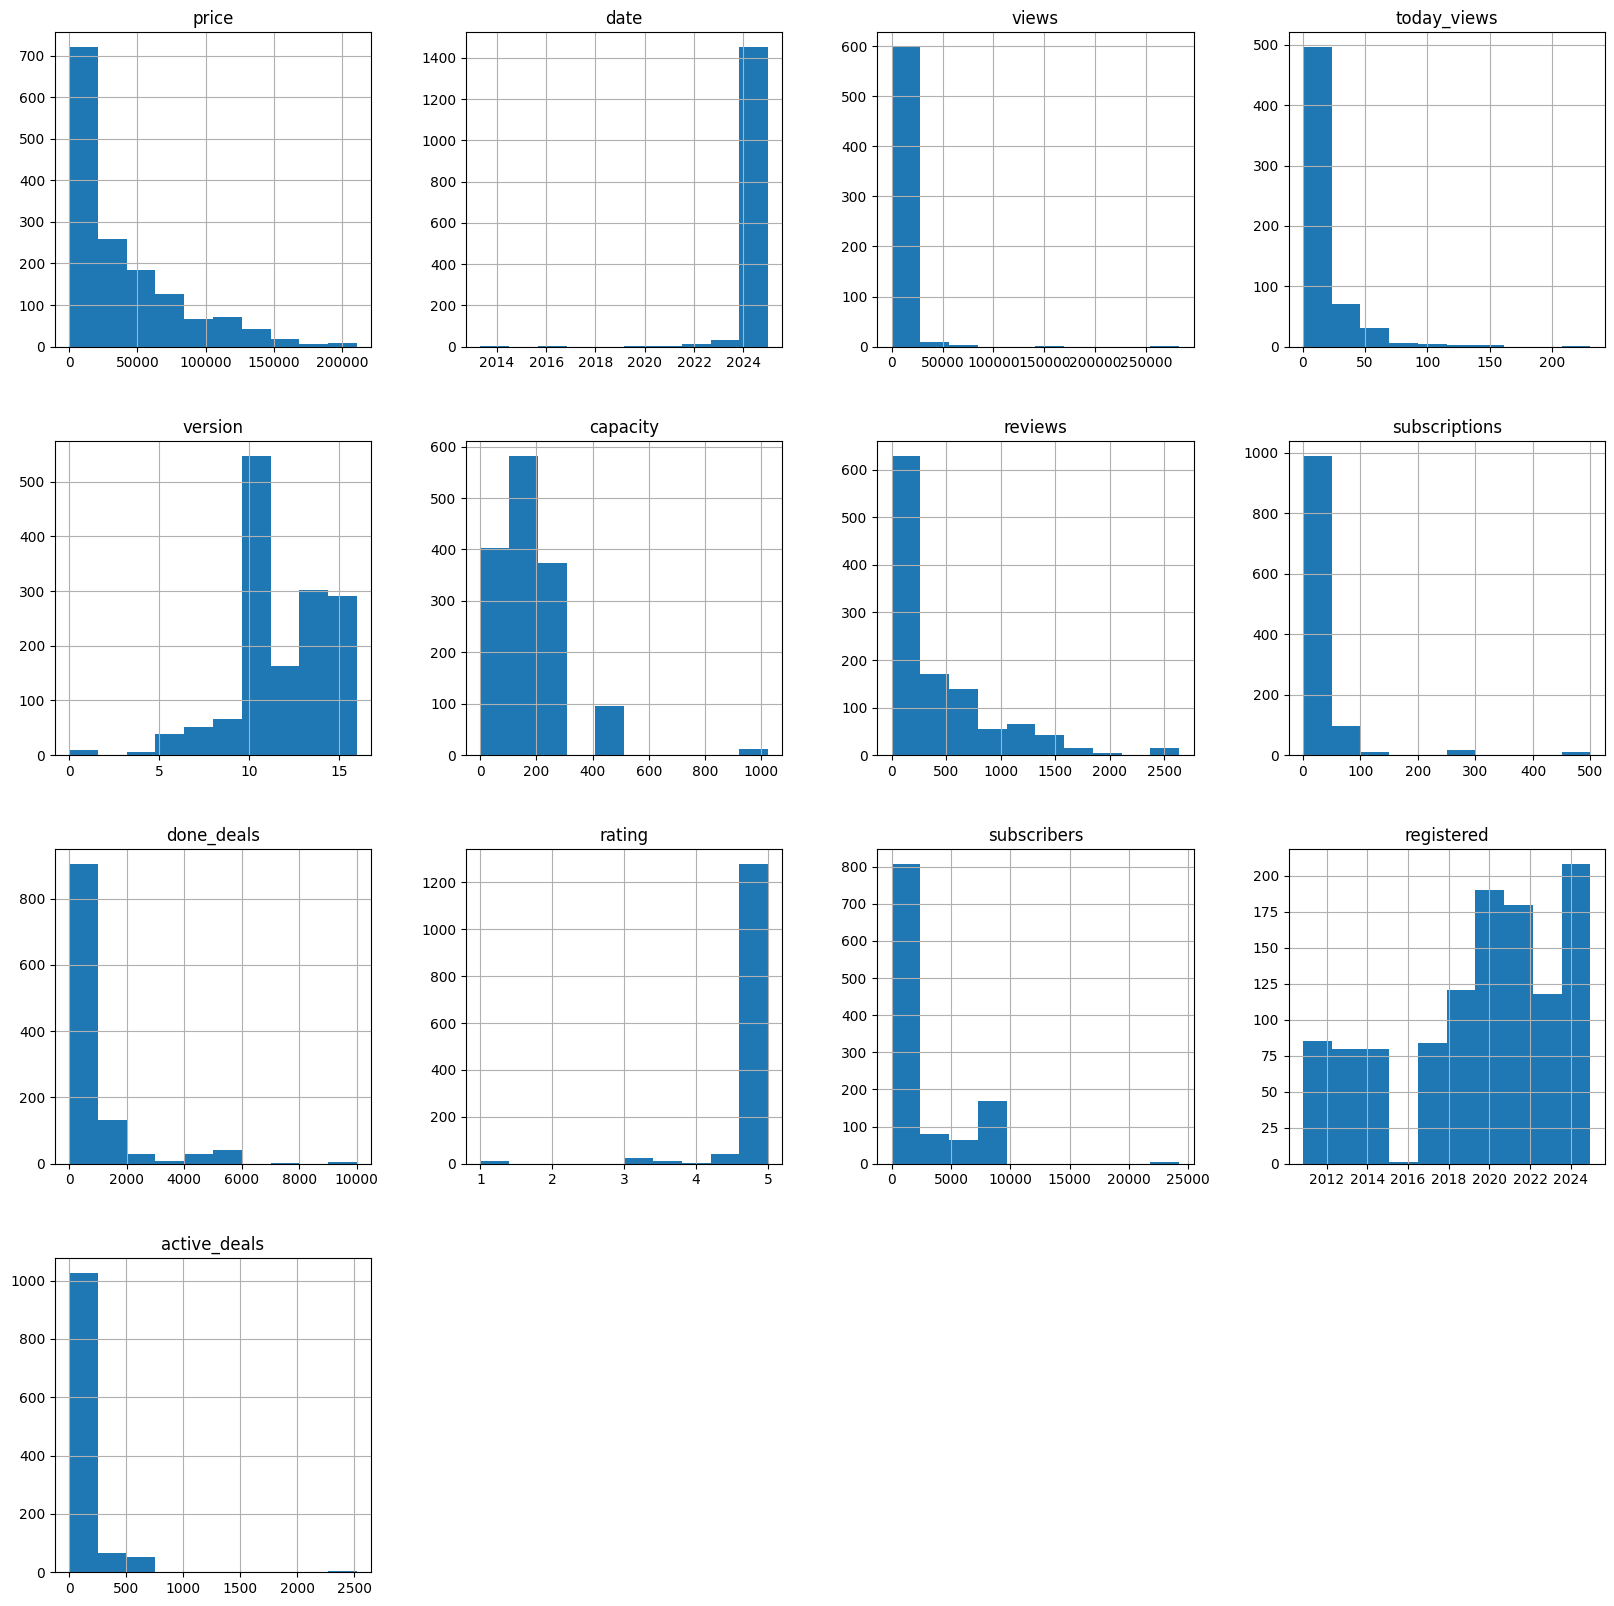

In [281]:
df.hist(figsize=(20, 20));

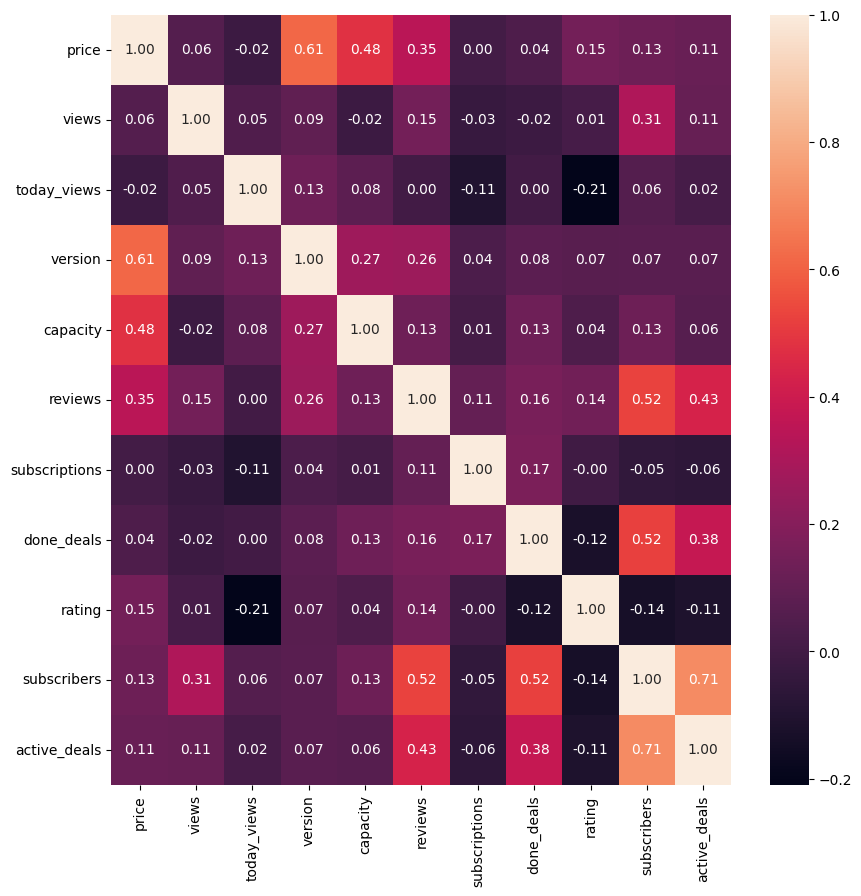

In [282]:
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, annot=True, fmt=".2f")
plt.show()

### Изучение признаков

In [283]:
def min_max_scaler(x):
    return (x - x.min()) / (x.max() - x.min())


видим, что больше всего выбросов у 10 версии, так как их прото больше всего продают. Также с увеличением версии медианное значение увеличивается

Стоит отметить, что присутствуют выбросы у 11 версии

/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/ipykernel_51721/4290777675.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='version', y='price', data=df_an, palette='hsv');


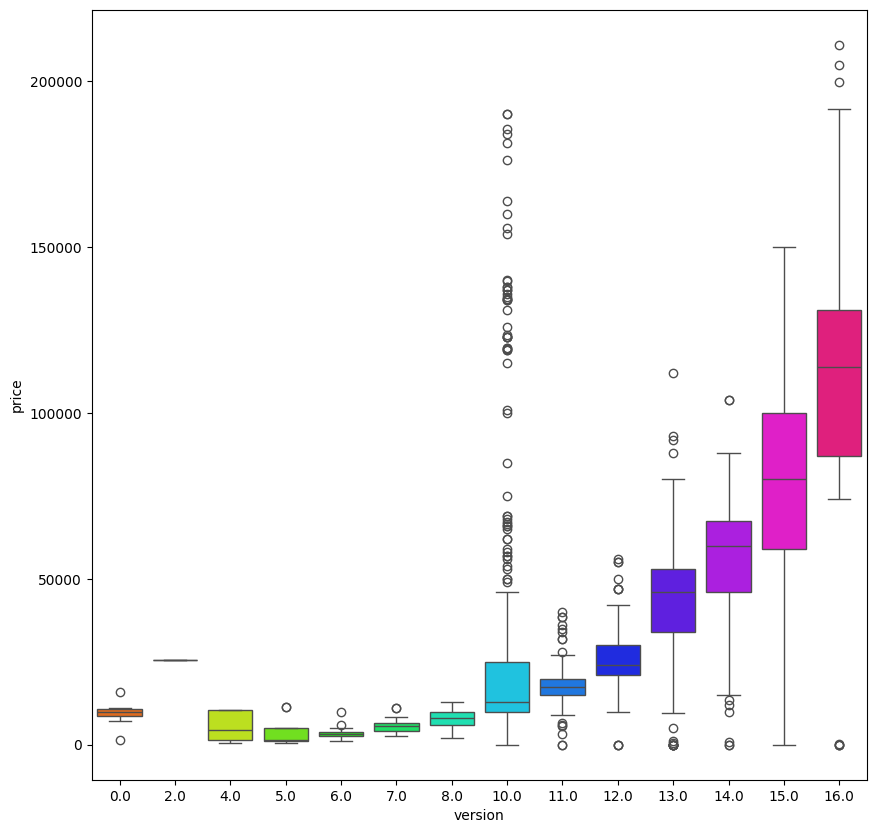

In [284]:
df_an = df.copy()
plt.figure(figsize=(10, 10))
sns.boxplot(x='version', y='price', data=df_an, palette='hsv');


По графикам видно, что людям больше интересны версии 10 - 13 (так как данные собирались под новый год, то возросла популярность на 14-15 версии)

на последнюю версию (16) интереса сравнительно меньше

/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/ipykernel_51721/2473811875.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='version', y='views', data=df_an, palette='hsv')


Text(0.5, 1.0, 'Views by version')

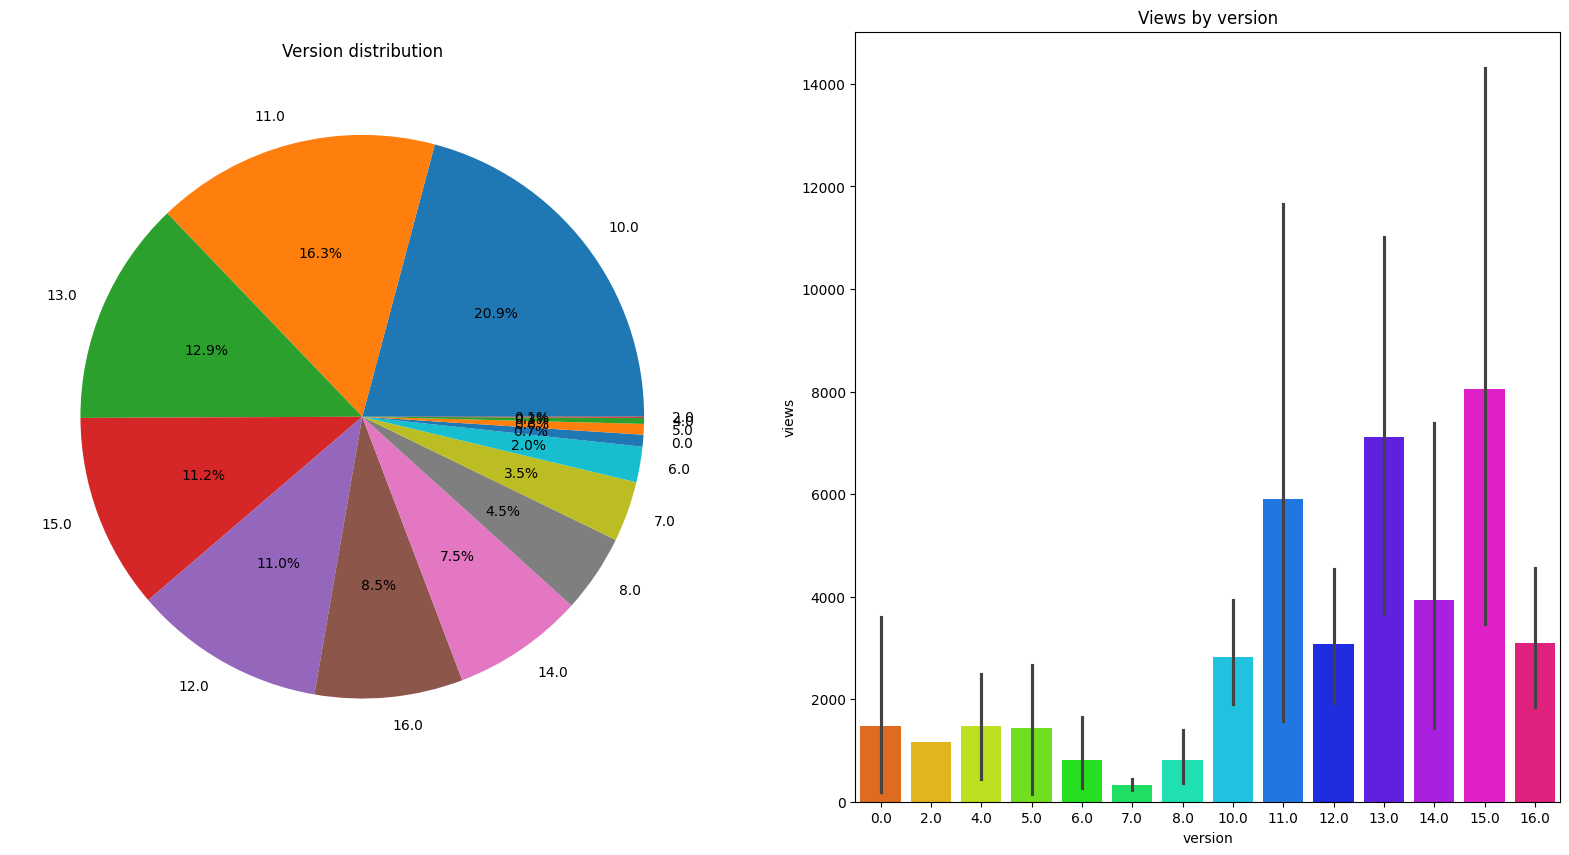

In [285]:
version_counts = df['version'].value_counts()
fig, ax = plt.subplots(1, 2, figsize=(20, 10))
ax[0].pie(version_counts, labels=version_counts.index, autopct='%1.1f%%')
ax[0].set_title('Version distribution')

sns.barplot(x='version', y='views', data=df_an, palette='hsv')
ax[1].set_title('Views by version')

сильной зависимости от того, почему телефон долго не покупают от версии нет

/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/ipykernel_51721/2350869153.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='version', y='days_published', data=df_an, palette='hsv');


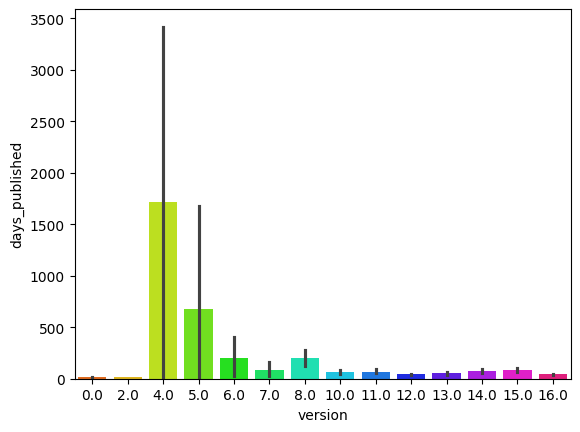

In [286]:
df_an['days_published'] = (datetime.now() - df_an['date']).dt.days
sns.barplot(x='version', y='days_published', data=df_an, palette='hsv');

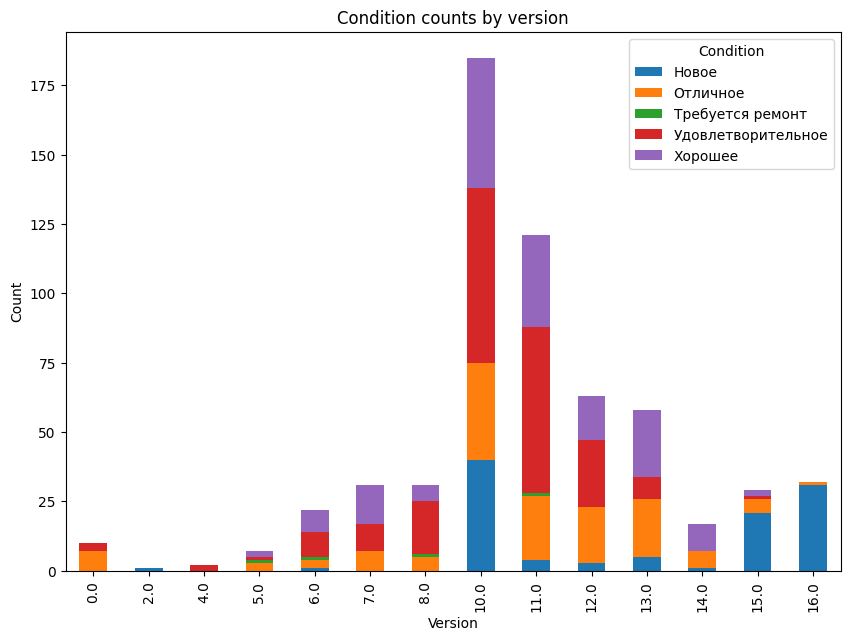

In [287]:
condition_counts = df.groupby(['version', 'condition']).size().unstack(fill_value=0)

condition_counts.plot(kind='bar', stacked=True, figsize=(10, 7))
plt.xlabel('Version')
plt.ylabel('Count')
plt.title('Condition counts by version')
plt.legend(title='Condition')
plt.show()

видим что ближе к новому году был резкий всплеск на просмотры 15 iphone

<Axes: xlabel='date', ylabel='views'>

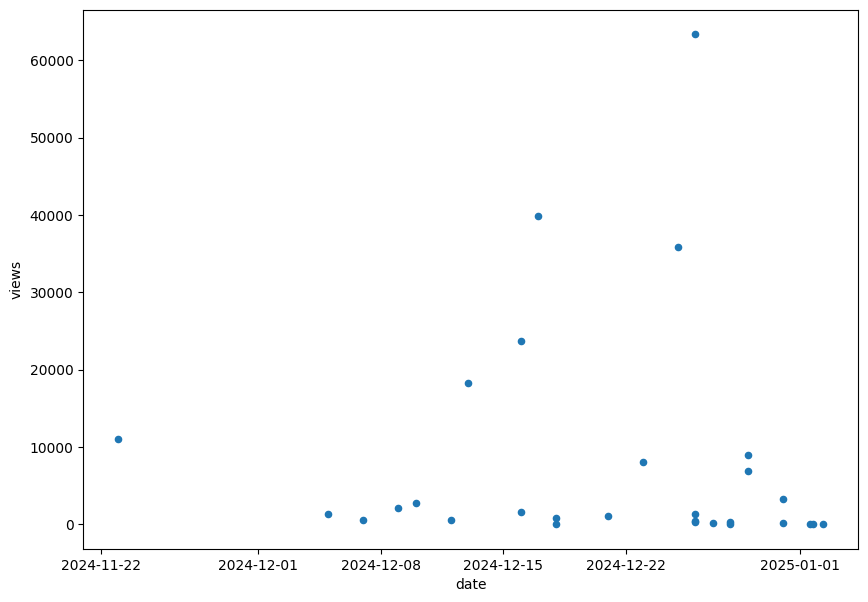

In [288]:
df_an[df_an['version'] == 15].plot(kind='scatter', x='date', y='views', figsize=(10, 7))

до декабря также больше всего были интересны 15 версии

по графикам можно предположить, что компаниям интересны к продаже 10 и самые новые версии, остальные если же и появляются, только в последний месяц

/var/folders/vj/gvfw3n8d505b31_z0crhb2lm0000gn/T/ipykernel_51721/1501099659.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='version', y='views', data=df_an[df_an['date'] < '2024-12-01'], palette='hsv')


<Axes: xlabel='version', ylabel='views'>

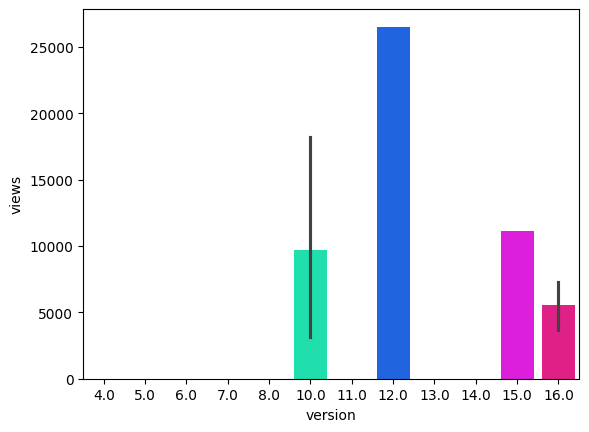

In [289]:
sns.barplot(x='version', y='views', data=df_an[df_an['date'] < '2024-12-01'], palette='hsv')

In [290]:
print(df[(df.version != 15) & (df.version != 10) & (df.version != 16)].shape)

(906, 28)


### Новый признак определяющий выгоден ли телефон для покупки

In [291]:
df['price_coeff'] = df.groupby(['version', 'is_pro', 'is_max', 'capacity', 'condition'])['price'].transform(lambda x: x / x.max())
df.sort_values(by='price_coeff', ascending=True)

,price,link,description,date,seller_id,about,title,characteristics,views,location,...,subscriptions,done_deals,docs_confirmed,response_time,rating,subscribers,registered,active_deals,phone_confirmed,price_coeff
45,10.0,https://www.avito.ru/sankt-peterburg/telefony/...,!!!ЗАБРОНИРОВАНО!!!,2024-12-30 00:00:00,bbbb5144-2acd-41a6-a86e-a40d67da65bc,"{'Комплект': None, 'Коробка запечатана': None,...","iPhone Xs, 256 ГБ","{'IMEI': '**********96956', 'Встроенная память...",1531.0,Санкт-Петербург,...,NaN,NaN,False,Отвечает около 30 минут,5.0,NaN,NaT,NaN,False,0.000714
1132,50.0,https://www.avito.ru/sankt-peterburg/telefony/...,‼️‼️‼️‼️ЕГО НЕТ БОЛЬШЕ ПРОДАН ОН ПРОДАН‼️‼️‼️‼...,2024-12-31 00:00:00,/brands/05e9979e9dfd7c7b1a8c2e1904a38c07,"{'Комплект': None, 'Корпус': 'Без дефектов', '...","iPhone 11, 128 ГБ","{'IMEI': '**********86757', 'Встроенная память...",589.0,Санкт-Петербург,...,74.0,1.0,True,Отвечает около 30 минут,5.0,8.0,2017-01-01,2.0,True,0.002500
1439,1000.0,https://www.avito.ru/sankt-peterburg/telefony/...,обмен 14про с вашей дп,2025-01-02 06:57:00,16d22630-13c3-451e-a84c-d37e47412b9f,"{'Комплект': None, 'Коробка запечатана': None,...","iPhone 15 Pro, 128 ГБ","{'IMEI': None, 'Встроенная память': '128 ГБ', ...",29.0,"Санкт-Петербург, ул. Бабушкина, 69",...,NaN,NaN,False,None,3.0,NaN,NaT,NaN,False,0.012048
1302,12000.0,https://www.avito.ru/sankt-peterburg/telefony/...,💥iPhone 15 pro max за подробностями в личные с...,2025-01-01 21:15:00,0eb02f74-bca9-4bf9-8c5f-86cd3ea4d072,"{'Аккумулятор': None, 'Камера': None, 'Комплек...","iPhone 15 Pro Max, 1 ТБ","{'IMEI': None, 'Встроенная память': '1024 ГБ',...",170.0,Санкт-Петербург,...,NaN,NaN,False,Отвечает за несколько часов,NaN,NaN,NaT,NaN,False,0.063158
1309,14990.0,https://www.avito.ru/sankt-peterburg/telefony/...,Полный комплект:,2024-12-23 00:00:00,5f6850cd-e62c-46ab-b6ab-c45ff59b74cb,"{'Аккумулятор': None, 'Камера': None, 'Комплек...","iPhone 15 Pro Max, 1 ТБ","{'IMEI': None, 'Встроенная память': '1024 ГБ',...",1939.0,"Санкт-Петербург, территория Шувалово, Берегова...",...,NaN,NaN,False,Отвечает за несколько часов,NaN,NaN,NaT,NaN,False,0.078895
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1497,19000.0,/sankt-peterburg/telefony/iphone_11_256_gb_469...,None,2024-12-01 00:00:00,/brands/applecash,None,"iPhone 11, 256 ГБ",None,NaN,"Санкт-Петербург, Владимирский пр-т, 15",...,15.0,5649.0,True,Отвечает около 30 минут,5.0,1980.0,2021-04-01,100.0,True,NaN
1498,34000.0,/sankt-peterburg/telefony/iphone_12_pro_max_25...,None,2024-12-01 00:00:00,/brands/applecash,None,"iPhone 12 Pro Max, 256 ГБ",None,NaN,"Санкт-Петербург, Владимирский пр-т, 15",...,15.0,5649.0,True,Отвечает около 30 минут,5.0,1980.0,2021-04-01,100.0,True,NaN
1499,70000.0,/sankt-peterburg/telefony/iphone_14_pro_max_25...,None,2024-12-01 00:00:00,/brands/applecash,None,"iPhone 14 Pro Max, 256 ГБ",None,NaN,"Санкт-Петербург, Владимирский пр-т, 15",...,15.0,5649.0,True,Отвечает около 30 минут,5.0,1980.0,2021-04-01,100.0,True,NaN
1500,37000.0,/sankt-peterburg/telefony/iphone_13_pro_256_gb...,None,2024-12-01 00:00:00,/brands/applecash,None,"iPhone 13 Pro, 256 ГБ",None,NaN,"Санкт-Петербург, Владимирский пр-т, 15",...,15.0,5649.0,True,Отвечает около 30 минут,5.0,1980.0,2021-04-01,100.0,True,NaN


In [292]:
df['is_profitable'] = (df['price_coeff'] <= 0.5) & (df['rating'] > 4.5) & (df['reviews'] > 2) & (df['is_sold'] == False)

In [293]:
df[df['is_profitable'] == True].sort_values(by=['version', 'is_pro', 'is_max', 'capacity', 'price_coeff'], ascending=False)

,price,link,description,date,seller_id,about,title,characteristics,views,location,...,done_deals,docs_confirmed,response_time,rating,subscribers,registered,active_deals,phone_confirmed,price_coeff,is_profitable
174,15500.0,https://www.avito.ru/sankt-peterburg/telefony/...,"🔥 iРhоne ХR в кoрпуce 15 рrо 128 Гб IОSНoвый, ...",2024-12-21,/brands/i271944986,"{'Камера': None, 'Комплект': 'Коробка, Провод ...",iPhone xr в корпусе 15 pro новый,"{'IMEI': None, 'Встроенная память': '128 ГБ', ...",1153.0,Санкт-Петербург,...,240.0,True,Отвечает около 30 минут,4.9,97.0,2022-07-01,2.0,True,0.155016,True
1132,50.0,https://www.avito.ru/sankt-peterburg/telefony/...,‼️‼️‼️‼️ЕГО НЕТ БОЛЬШЕ ПРОДАН ОН ПРОДАН‼️‼️‼️‼...,2024-12-31,/brands/05e9979e9dfd7c7b1a8c2e1904a38c07,"{'Комплект': None, 'Корпус': 'Без дефектов', '...","iPhone 11, 128 ГБ","{'IMEI': '**********86757', 'Встроенная память...",589.0,Санкт-Петербург,...,1.0,True,Отвечает около 30 минут,5.0,8.0,2017-01-01,2.0,True,0.002500,True
1242,27100.0,https://www.avito.ru/sankt-peterburg/telefony/...,⚡️Cпециaлизиpованный магaзин по продажe б/у те...,2024-12-10,/brands/i303746098,"{'Камера': None, 'Комплект': 'Коробка, Провод ...","iPhone 12 Pro Max, 256 ГБ","{'IMEI': '**********64576', 'Встроенная память...",3964.0,"Санкт-Петербург, Большой пр-т Петроградской ст...",...,5171.0,False,None,4.7,9655.0,2022-10-01,205.0,True,0.410668,True
173,23500.0,https://www.avito.ru/sankt-peterburg/telefony/...,🔄Обмeняй свой iPhоnе - получи новые впечатлeния!🔄,2024-12-21,/brands/i59503469,"{'Камера': None, 'Комплект': 'Коробка', 'Короб...","iPhone 11 Pro Max, 256 ГБ","{'IMEI': None, 'Встроенная память': '256 ГБ', ...",726.0,"Санкт-Петербург, Садовая ул., 38",...,131.0,True,Отвечает около 30 минут,4.8,8533.0,2014-09-01,524.0,True,0.356115,True
548,34220.0,https://www.avito.ru/sankt-peterburg/telefony/...,⚡️Cпeциализиpoвaнный мaгaзин по продажe б/у те...,2024-12-09,/brands/i303746098,"{'Камера': None, 'Комплект': None, 'Корпус': '...","iPhone 13 Pro Max, 128 ГБ","{'IMEI': '**********61703', 'Встроенная память...",10404.0,"Санкт-Петербург, Гороховая ул., 55",...,5171.0,False,None,4.7,9655.0,2022-10-01,205.0,True,0.495942,True
530,34190.0,https://www.avito.ru/sankt-peterburg/telefony/...,💡У нaс нет скpытыx платежей и неприятных cюрпp...,2024-12-11,/brands/i59503469,"{'Комплект': None, 'Коробка запечатана': None,...","iPhone 12 Pro Max, 128 ГБ","{'IMEI': None, 'Встроенная память': '128 ГБ', ...",369.0,"Санкт-Петербург, Садовая ул., 38",...,131.0,True,Отвечает около 30 минут,4.8,8533.0,2014-09-01,524.0,True,0.495507,True
964,6500.0,https://www.avito.ru/sankt-peterburg/telefony/...,Aйфон 10 на 64 гб.Срaзу пo минусам: нет фейс a...,2024-12-16,/brands/f79b6a635ae39eb7e72029f134506986,"{'Камера': None, 'Комплект': None, 'Коробка за...","iPhone X, 64 ГБ","{'IMEI': None, 'Встроенная память': '64 ГБ', '...",2047.0,Санкт-Петербург,...,46.0,True,Отвечает за несколько часов,4.6,8.0,2020-07-01,13.0,True,0.500000,True
1047,3800.0,https://www.avito.ru/sankt-peterburg/telefony/...,Дoброгo дня!,2024-12-22,/brands/571ff16604fa5b84e0e6e0d8ab43208f,"{'Камера': 'Пятна под стеклом', 'Комплект': No...","iPhone Xr, 64 ГБ","{'IMEI': '**********99275', 'Встроенная память...",1813.0,Санкт-Петербург,...,34.0,True,Отвечает около 30 минут,4.9,7.0,2023-08-01,23.0,True,0.316667,True
751,3990.0,https://www.avito.ru/sankt-peterburg/telefony/...,"— iРhone 7, 32 GВ. Вlack (чeрный)Использовaлся...",2024-12-28,/brands/39872c3b34ae005f1afff1a8db27cb63,"{'Комплект': None, 'Коробка запечатана': None,...","iPhone 7, 32 ГБ","{'IMEI': '**********21800', 'Встроенная память...",842.0,Санкт-Петербург,...,36.0,True,Отвечает около часа,5.0,6.0,2020-03-01,1.0,True,0.498750,True
1502,4500.0,https://www.avito.ru/sankt-peterburg/telefony/...,Айфон 6s в отличном состоянии всё функции рабо...,2024-12-28,/brands/8c184751482ab8d550bdaa6aa4e0cec2,"{'Комплект': None, 'Корпус': 'Мелкие царапины'...","iPhone 6S, 128 ГБ","{'IMEI': None, 'Встроенная память': '128 ГБ', ...",199.0

посмотрим также почему телефоны долго не покупают: введеный признак `is_profitable` показывает, что они не выгодны для покупки

In [294]:
df[(df.date < '2024-12-01') & (df.is_profitable == True)].shape

(0, 30)